<a href="https://colab.research.google.com/github/shivanidedhia/MarketingCampaign/blob/main/Phase_2_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
%matplotlib inline
from pathlib import Path
from scipy import stats



no display found. Using non-interactive Agg backend


# Loading the dataset

In [ ]:
df= pd.read_csv('marketing_campaign.csv')

In [ ]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,11/13/2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,5/8/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,3/13/2014,68,28,...,20,1,0,0,0,0,0,3,11,0


### Total Number of rows and columns in the dataset:
#### Rows = 2,240
#### Columns = 29

In [ ]:
df.shape

(2240, 29)

### Column names in the dataset

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Checking the type of data to understand what all columns it contains and of what types and whether they contain any value or not.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### So we see that we have 3 categorical variables and 26 numerical variables. We can also see that there are missing values in the column 'Income'. We will do missing value treatment later. 

## -----------------------------------------------------------------------------------------------------------------------

# Defining the target variable

### As per the dataset the column Response (target) in itself is one of the campaigns (last campaign). So, in total there are 6 campaigns.
### Let's create a target variable called 'Customer_Response' where the value will be 1 if the customer responds to any of the 6 campaigns and 0 if the customer has not responded to any campaign. 

In [ ]:
df['Customer_Response'] = np.where(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1) >= 1, 1, 0)

In [ ]:
# Checking if the new target variable is created accurately or not
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,3,11,0,0


In [ ]:
# Renaming the 6th campaign name to intuitive column name 
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Customer_Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,3,11,0,0


## 1 a. Frequency of the target variable

In [ ]:
df['Customer_Response'].value_counts()

0    1631
1     609
Name: Customer_Response, dtype: int64

### 1631 is the number of instances for 0 which tells that there are 1631 customers who have not responded to the any of the campaign.
### 609 is the number of instances for 1 which tells that there are 609 customers who have responded to atleast one of the campaign.
###  We can also see that creating the 'Customer_Reponse' variable reduced the number of '0's and provides a holoistic view if the customers ever accepted the offers through the campaigns

### As new target variable i.e 'Customer_response' is created from the 6 campaigns , there is no more use of the 6 campaign columns, so we can drop it.

### Also dropping column 'Z_CostContact' & 'Z_Revenue' as they are constant variables.

In [ ]:
df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'Z_CostContact', 'Z_Revenue'], axis = 1)

### 1 b. Identifying missing values & duplicates

In [ ]:
# Recalculating the missing values in the dataset
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Customer_Response       0
dtype: int64

### Only 'Income' valriable has missing values. There are 24 missing values for the 'Income' variable. 
### Let's understand more about column 'Income'

### Based on above table, there are no anomalies found in terms of '0's in the variables

In [ ]:
 df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

### Handling missing values can be done in few ways- 
### We can delete the entire column containing null-values
### delete the rows containing null-values or can impute the mean value
### So, let's treat the missing values in 'Income' column by Imputation method.
### Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.

In [ ]:
missing_col = ['Income']
#Technique : Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [ ]:
print("count of NULL values after imputation\n")
df.isnull().sum()

count of NULL values after imputation



ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Customer_Response      0
dtype: int64

### Now there are no null values after imputation

### Checking for duplicates

In [ ]:
df.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,...,42,118,247,2,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,...,0,0,8,7,8,2,5,7,0,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,...,32,12,24,1,2,3,13,6,0,1
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,...,80,30,61,2,6,5,10,3,0,0


In [ ]:
# The duplicated values are indicated as True values in the resulting Series
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool


### After performing the action to remove duplicates the total number of rows are still 2240 which tells that there are no duplicate values in the dataset.

In [ ]:
# Calculating number of Zeroes in each of the columns to find anomalies if any (such as high number of zeroes in Year_Birth)
df.isin([0]).sum()

ID                        1
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                1293
Teenhome               1158
Dt_Customer               0
Recency                  28
MntWines                 13
MntFruits               400
MntMeatProducts           1
MntFishProducts         384
MntSweetProducts        419
MntGoldProds             61
NumDealsPurchases        46
NumWebPurchases          49
NumCatalogPurchases     586
NumStorePurchases        15
NumWebVisitsMonth        11
Complain               2219
Customer_Response      1631
dtype: int64

### Based on above table, there are no anomalies found in terms of '0's in the variables

### 1 c. Relationship between varibles

### Dropping 'ID' column

In [ ]:
df = df.drop(['ID'], axis = 1)

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Response
0,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,...,46,27,15,5,5,3,6,5,0,0


In [ ]:
# Statistical summary of data frame
df.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,0.271875
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.445025
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1945.000000,7705.920000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
10%,1952.000000,24219.500000,0.000000,0.000000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000
20%,1957.000000,32230.000000,0.000000,0.000000,19.000000,16.000000,1.000000,12.000000,2.000000,1.000000,6.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
30%,1962.000000,38361.000000,0.000000,0.000000,29.000000,34.000000,2.000000,20.000000,3.000000,2.000000,11.000000,1.000000,2.000000,1.000000,3.000000,4.000000,0.000000,0.000000
40%,1966.000000,44944.200000,0.000000,0.000000,39.000000,81.000000,4.000000,35.000000,7.000000,5.000000,17.000000,1.000000,3.000000,1.000000,4.000000,5.000000,0.000000,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000


### To understand the relationship between dependent variable and independent variables, creating plot and heatmap

In [ ]:
predictors = [ 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

outcome = 'Customer_Response'


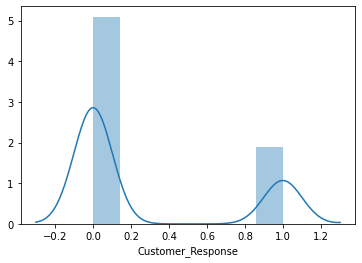

In [ ]:
sns.distplot(df['Customer_Response'])

### Above graph shows the ratio between the customers who responded to any of the campaigns and those who never responded to any campaign

In [ ]:
df['Customer_Response'].sum()

609

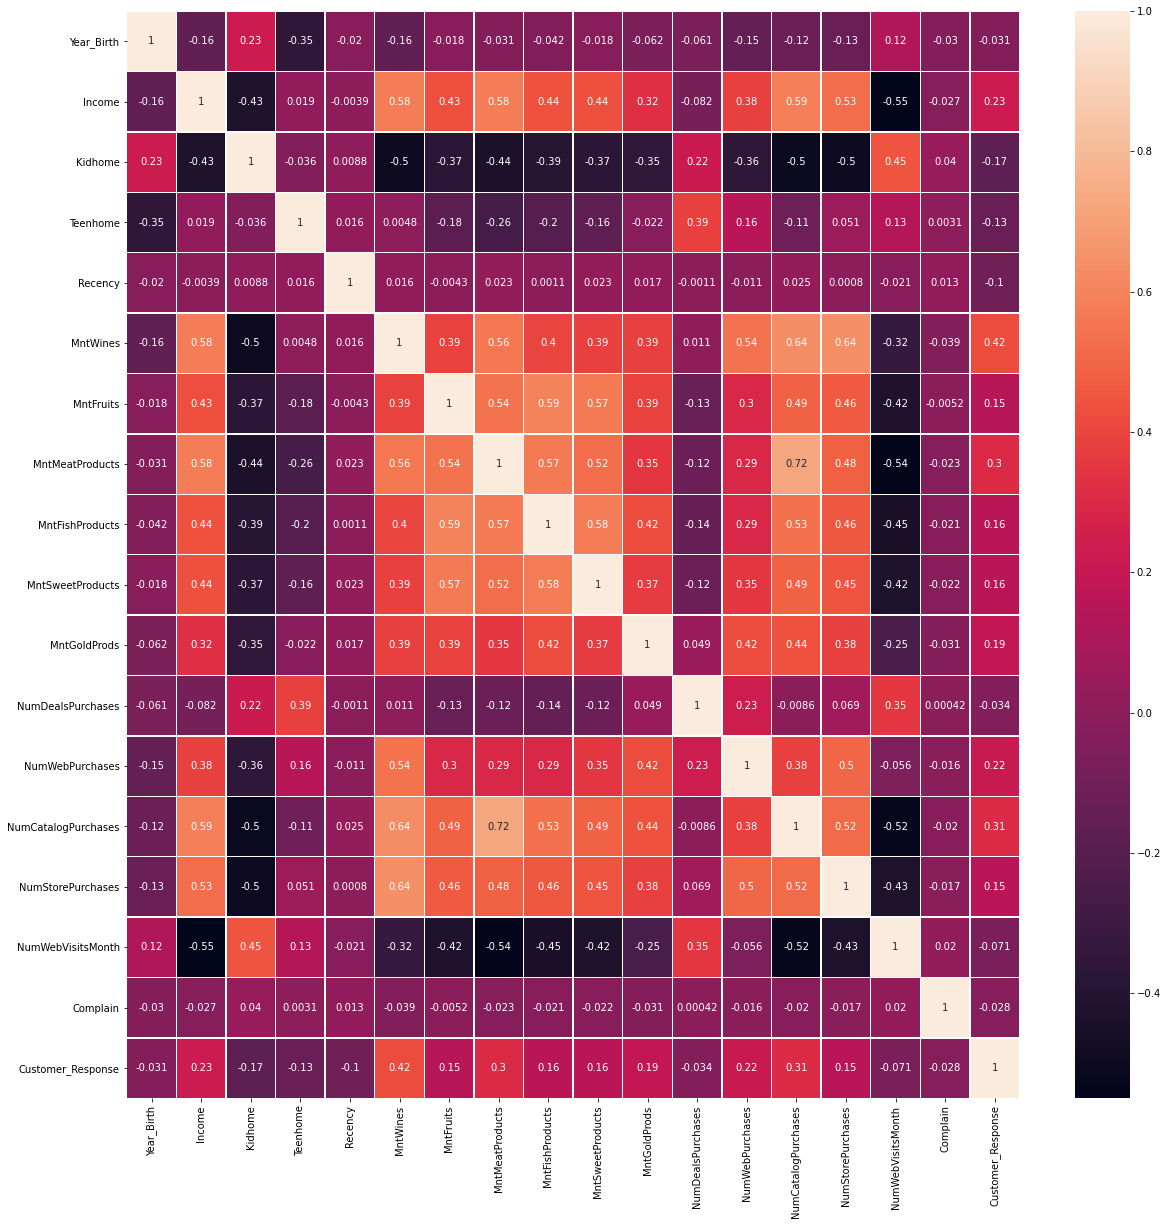

In [ ]:
df_small = df.iloc[:,:29]
correlation_mat = df_small.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True, linewidths=.5)
plt.show()

### Each square of the heatmap shows correlation between the variables on each axis. Values closer to zero means there is no linear trend between the two variables. The close to 1 correlation is positively correlated. Taking positive 0.4 as the benchmark, we can check which variables have more postive corelarion with other variables.

### Identifying the outliers with interquartile range

In [ ]:
#Sorting the dataset
# 50th percentile is median
sorted(df)
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year_Birth                18.0
Income                 32751.0
Kidhome                    1.0
Teenhome                   1.0
Recency                   50.0
MntWines                 480.5
MntFruits                 32.0
MntMeatProducts          216.0
MntFishProducts           47.0
MntSweetProducts          32.0
MntGoldProds              47.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        4.0
NumStorePurchases          5.0
NumWebVisitsMonth          4.0
Complain                   0.0
Customer_Response          1.0
dtype: float64


In [ ]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Complain                21
Customer_Response        0
Dt_Customer              0
Education                0
Income                   8
Kidhome                  0
Marital_Status           0
MntFishProducts        223
MntFruits              227
MntGoldProds           207
MntMeatProducts        175
MntSweetProducts       248
MntWines                35
NumCatalogPurchases     23
NumDealsPurchases       86
NumStorePurchases        0
NumWebPurchases          4
NumWebVisitsMonth        8
Recency                  0
Teenhome                 0
Year_Birth               3
dtype: int64

### Here Complain variable do not require an outlier treatment as it has binary values(1, 0)

### Outlier treatment has to be done. There are different outlier treatment like by calculating mean and median, but the one of the most commonly used approach is calculating percentile  value and replacing the outliers with that percentile value. 

### After doing the outlier treatment then we again find the relationship between variables.

### Understanding the outliers with visualization and treating it 

In [ ]:
#Shows the skewness value of Income and also summary statistics
print(df['Income'].skew())
df['Income'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

6.799964754609881


count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
1%         7705.920000
10%       24219.500000
20%       32230.000000
30%       38361.000000
40%       44944.200000
50%       51741.500000
60%       58169.600000
70%       65104.600000
80%       71634.800000
90%       79800.300000
99%       94437.680000
max      666666.000000
Name: Income, dtype: float64

### The skewness value of 6.8 shows that the variable 'Income' has right-skewes distribution, imdicating presence of extreme values. Based on research, skewness value greater than 3.5 shows skewness.
https://stats.stackexchange.com/questions/436274/performing-t-test-on-highly-skewed-financial-data-outlier-treatment#:~:text=After%20treating%20for%20outliers%2C%20most,and%20%2B1.5%20max%20is%203.5.

### Let's do Outlier Treatment
### Quantile-based Flooring and Capping

In [ ]:
print(df['Income'].quantile(0.5))
print(df['Income'].quantile(0.99))

51741.5
94437.68000000002


### Now we will remove the outliers of 'Income' and calculate the skewness value again

1.1398665006304742


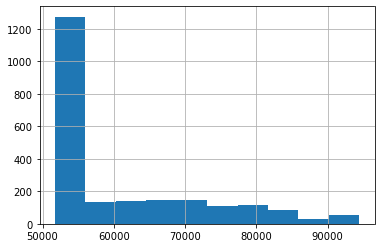

In [ ]:
df["Income"] = np.where(df["Income"] <df['Income'].quantile(0.5), df['Income'].quantile(0.5),df['Income'])
df["Income"] = np.where(df["Income"] >df['Income'].quantile(0.99), df['Income'].quantile(0.99),df['Income'])
print(df['Income'].skew())
df.Income.hist()

In [ ]:
#Outlier treatment for "MntMeatProducts"
print(df['MntMeatProducts'].quantile(0.1))
print(df['MntMeatProducts'].quantile(0.99))

7.0
915.0


In [ ]:
df["MntMeatProducts"] = np.where(df["MntMeatProducts"] <df['MntMeatProducts'].quantile(0.1), df['MntMeatProducts'].quantile(0.1),df['MntMeatProducts'])
df["MntMeatProducts"] = np.where(df["MntMeatProducts"] >df['MntMeatProducts'].quantile(0.99), df['MntMeatProducts'].quantile(0.99),df['MntMeatProducts'])

1.7142127637598157


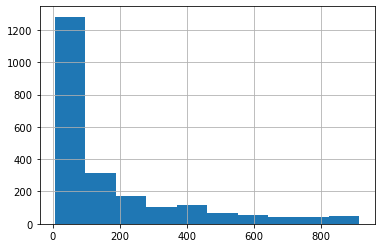

In [ ]:
#After treatment SKewness and distribution of data points through histogram.
print(df['MntMeatProducts'].skew())
df.MntMeatProducts.hist()

In [ ]:
#Outlier treatment for "NumWebPurchases"
print(df['NumWebPurchases'].quantile(0.01))
print(df['NumWebPurchases'].quantile(0.99))

0.0
11.0


In [ ]:
df["NumWebPurchases"] = np.where(df["NumWebPurchases"] <df['NumWebPurchases'].quantile(0.01), df['NumWebPurchases'].quantile(0.01),df['NumWebPurchases'])
df["NumWebPurchases"] = np.where(df["NumWebPurchases"] >df['NumWebPurchases'].quantile(0.99), df['NumWebPurchases'].quantile(0.99),df['NumWebPurchases'])

0.7008290253066227


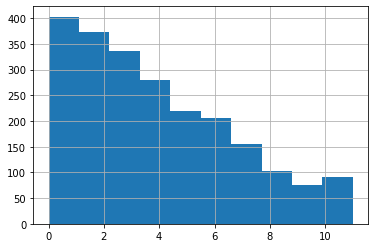

In [ ]:
#After treatment SKewness and distribution of data points through histogram.
print(df['NumWebPurchases'].skew())
df.NumWebPurchases.hist()

In [ ]:
print(df['NumCatalogPurchases'].quantile(0.01))
print(df['NumCatalogPurchases'].quantile(0.99))

0.0
10.610000000000127


In [ ]:
df["NumCatalogPurchases"] = np.where(df["NumCatalogPurchases"] <df['NumCatalogPurchases'].quantile(0.01), df['NumCatalogPurchases'].quantile(0.01),df['NumCatalogPurchases'])
df["NumCatalogPurchases"] = np.where(df["NumCatalogPurchases"] >df['NumCatalogPurchases'].quantile(0.99), df['NumCatalogPurchases'].quantile(0.99),df['NumCatalogPurchases'])

1.0979442568805213


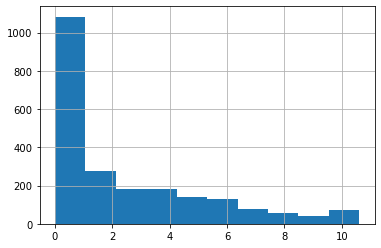

In [ ]:
print(df['NumCatalogPurchases'].skew())
df.NumCatalogPurchases.hist()

In [ ]:
print(df['NumWebVisitsMonth'].quantile(0.01))
print(df['NumWebVisitsMonth'].quantile(0.99))

1.0
9.0


In [ ]:
df["NumWebVisitsMonth"] = np.where(df["NumWebVisitsMonth"] <df['NumWebVisitsMonth'].quantile(0.01),df['NumWebVisitsMonth'].quantile(0.01),df['NumWebVisitsMonth'])
df["NumWebVisitsMonth"] = np.where(df["NumWebVisitsMonth"] >df['NumWebVisitsMonth'].quantile(0.99), df['NumWebVisitsMonth'].quantile(0.99),df['NumWebVisitsMonth'])

-0.3401723863667043


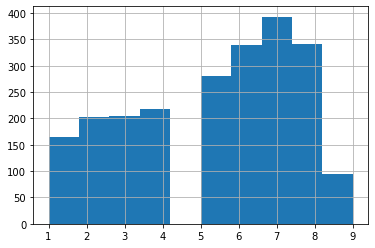

In [ ]:
print(df['NumWebVisitsMonth'].skew())
df.NumWebVisitsMonth.hist()

### Same # of rows before and after Outlier treatment

In [ ]:
df.shape

(2240, 21)

### To understand the types of marital status in the dataset, listed unique values in the Marital_Status column.


In [ ]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### From Business perspective, accepted Marital Status coule be single, married, together(not married), divorced, and widow. Apart from these marital status, the rest that are 'Alone', 'YOLO', 'Absurd' can be considered as 'Single'. 
### So replacing the data cells which have 'Alone', 'YOLO', 'Absurd' with 'Single'.

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd','YOLO','Alone'],['Single','Single','Single'])

In [ ]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

### To understand the types of Education that respondents have in the dataset, listed unique values in the 'Eduction' column

In [ ]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### Correlation Matrix after Outlier Treatment

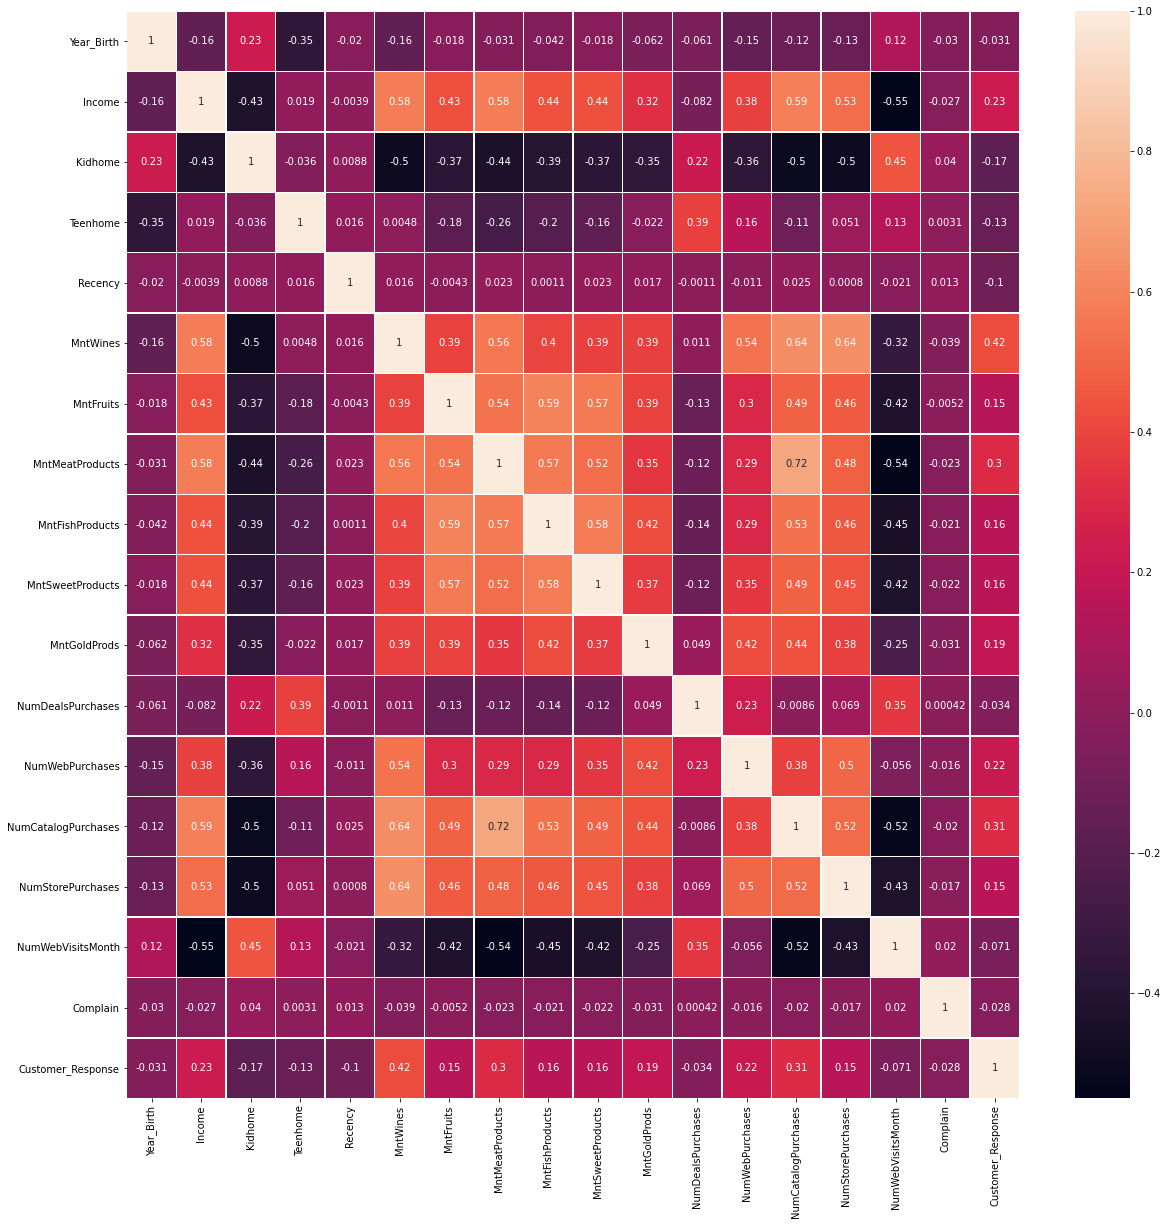

In [ ]:
df_after = df.iloc[:,:29]
correlation_mat = df_small.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True, linewidths=.5)
plt.show()

In [ ]:
# Education has 2n Cycle and Master which means the same so we will change that

In [ ]:
df['Education'].value_counts().index.sort_values(ascending=True)

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object')

In [ ]:
df['Education'] = df["Education"].replace('2n Cycle', "Master")

## Baseline Model

In [ ]:
list(df.columns.values)

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'Customer_Response']

In [ ]:
predictors = ['Year_Birth','Education','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts',
              'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
              'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain']
outcome = 'Customer_Response'

In [ ]:
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]

In [ ]:
X.shape

(2240, 19)

In [ ]:
X.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
       'Education_Graduation', 'Education_Master', 'Education_PhD'],
      dtype='object')

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


## Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(train_X, train_y)

LogisticRegression(solver='liblinear')

In [ ]:
print('intercept ', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=X.columns).sort_values('coefficient',ascending=False))
print()

intercept  -3.3542211839166094e-06
                      coefficient
NumWebVisitsMonth        0.003527
MntWines                 0.002511
MntMeatProducts          0.001428
MntGoldProds             0.001181
MntSweetProducts         0.000921
Kidhome                  0.000382
Education_Graduation     0.000096
NumCatalogPurchases      0.000023
Education_PhD            0.000015
Income                   0.000004
Complain                -0.000023
Education_Master        -0.000147
Teenhome                -0.000762
NumDealsPurchases       -0.000817
Year_Birth              -0.000886
MntFishProducts         -0.001724
MntFruits               -0.003473
NumStorePurchases       -0.005683
Recency                 -0.012848



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Accuracy:",accuracy_score(valid_y, logit.predict(valid_X)))
print("precision score: ", precision_score(valid_y,logit.predict(valid_X)))
print("recall score: ", recall_score(valid_y,logit.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,logit.predict(valid_X)))

Accuracy: 0.7611607142857143
precision score:  0.6356589147286822
recall score:  0.3293172690763052
f1-score:  0.43386243386243384


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_X, train_y)

GaussianNB()

In [ ]:
# predict probabilities
predProb_train = nb.predict_proba(train_X)
predProb_valid = nb.predict_proba(valid_X)

# predict class membership
y_valid_pred = nb.predict(valid_X)
y_train_pred = nb.predict(train_X)

In [ ]:
df['Customer_Response'].value_counts()

0    1631
1     609
Name: Customer_Response, dtype: int64

In [ ]:
%matplotlib inline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

# training
classificationSummary(train_y, nb.predict(train_X))

#accuracy of model for both training set and validation set
print('\nAccuracy on train is', round(accuracy_score(train_y,y_train_pred),2))
print('Precision score on train is', round(precision_score(train_y,y_train_pred, pos_label =1),2))
print('Recall score on train is', round(recall_score(train_y,y_train_pred, pos_label = 1),2))
print('F1 score on train is', round(f1_score(train_y,y_train_pred, pos_label = 1),2))

Confusion Matrix (Accuracy 0.7180)

       Prediction
Actual   0   1
     0 769 215
     1 164 196

Accuracy on train is 0.72
Precision score on train is 0.48
Recall score on train is 0.54
F1 score on train is 0.51


In [ ]:
# validation
classificationSummary(valid_y, nb.predict(valid_X))

print('\nAccuracy on validation is', round(accuracy_score(valid_y,y_valid_pred),2))
print('Precision score on validation is', round(precision_score(valid_y,y_valid_pred, pos_label = 1),2))
print('Recall score on validation is', round(recall_score(valid_y,y_valid_pred, pos_label = 1),2))
print('F1 score on validation is', round(f1_score(valid_y,y_valid_pred, pos_label = 1),2))

Confusion Matrix (Accuracy 0.7076)

       Prediction
Actual   0   1
     0 498 149
     1 113 136

Accuracy on validation is 0.71
Precision score on validation is 0.48
Recall score on validation is 0.55
F1 score on validation is 0.51


In [ ]:
NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
1,Income,58234.777029
0,Year_Birth,1969.195122
5,MntWines,217.707317
7,MntMeatProducts,124.532520
4,Recency,50.345528
10,MntGoldProds,38.339431
8,MntFishProducts,31.025407
9,MntSweetProducts,22.453252
6,MntFruits,21.793699
13,NumStorePurchases,5.509146


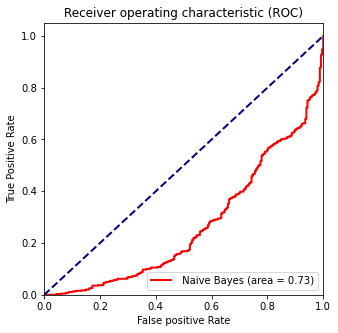

In [ ]:
from sklearn.metrics import roc_curve,auc
from matplotlib import pyplot as plt


def roc_graph(nb,valid_y,valid_X):
    fpr,tpr, _ = roc_curve(valid_y,nb.predict_proba(valid_X)[:,1],pos_label = 1)
    roc_auc = auc(fpr,tpr)
    
    plt.figure(figsize=[5,5])
    plt.plot(tpr,fpr,color='red',
            lw=2, label=' Naive Bayes (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
    
roc_graph(nb,valid_y,valid_X)

## Feature engineering

#### This will help improve the performance of our models. It will increase the predictive power of our algorithm

#### Adding age of the customer to better undnerstand the demographics 

In [ ]:
df['Age'] = 2021 - df['Year_Birth']

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Response,Age
0,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,...,88,88,3,8.0,10.0,4,7.0,0,1,64
1,1954,Graduation,Single,51741.5,1,1,3/8/2014,38,11,1,...,1,6,2,1.0,1.0,2,5.0,0,0,67
2,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,...,21,42,1,8.0,2.0,10,4.0,0,0,56
3,1984,Graduation,Together,51741.5,1,0,2/10/2014,26,11,4,...,3,5,2,2.0,0.0,4,6.0,0,0,37
4,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,...,27,15,5,5.0,3.0,6,5.0,0,0,40


#### dropping the Year_Birth col since we now have age

In [ ]:
df.drop('Year_Birth', axis=1, inplace=True)

#### Dt_Customer represents the date since the customer has been with the company

In [ ]:
import datetime
from datetime import datetime, date

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%m/%d/%Y")

In [ ]:
for i in range(0, len(df)):
    df['Customer_w_Company'] = datetime.today().date()-df['Dt_Customer'].dt.date

In [ ]:
df['Customer_w_Company'].dtype

dtype('<m8[ns]')

#### Customer Spending - Sum of all products

##### We should remove all the other cols, since the aggregate spending should be enough. Unless we want to analyse spending on each product 

In [ ]:
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

#### Added a Martial Status to indicate if the person is Alone, Couple or Married

In [ ]:
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone'})

#### Added Any_Child col to show if the customer has any children

In [ ]:
df['Any_Child'] = np.where(df.Kidhome+df.Teenhome > 0, 'Yes', 'No')

#### Dropping Kid Home and Teen Home as they are replaced with Any_Child

In [ ]:
df.drop('Kidhome', axis=1, inplace=True)

In [ ]:
df.drop('Teenhome', axis=1, inplace=True)